<a href="https://colab.research.google.com/github/Madhanmetha/ML/blob/main/Decision%20Tree/Titanic_Passangers_survivors_Prediction_ML_using_Desision_Tree_and_Test_split_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
from sklearn import linear_model


In [135]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
inputs =df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
target =df['Survived']

In [137]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [138]:
inputs

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
le_sex =LabelEncoder()

In [141]:
inputs['Sex_new'] = le_sex.fit_transform(inputs['Sex'])

In [142]:
inputs

,Survived,Pclass,Sex,Age,Fare,Sex_new
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [143]:
inputs_n =inputs.drop(['Sex'],axis='columns')

In [144]:
inputs_n

,Survived,Pclass,Age,Fare,Sex_new
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [145]:
from sklearn import tree

In [146]:
model =tree.DecisionTreeClassifier()

In [147]:
df2 = df["Age"].median()
df2
#newdf = inputs_n['Age'].fillna(28)
#newdf
inputs_n["Age"].fillna("28", inplace = True) #perfect code for filling paticular rowns and columns
inputs_n

<ipython-input-147-cbdc80e680ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs_n["Age"].fillna("28", inplace = True) #perfect code for filling paticular rowns and columns
<ipython-input-147-cbdc80e680ee>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inputs_n["Age"].fillna("28", inplace = True) #perfect code for filling paticular rowns and 

,Survived,Pclass,Age,Fare,Sex_new
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,28,23.4500,0
889,1,1,26.0,30.0000,1


In [148]:
x= inputs_n
y= target

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0, train_size = 0.75)

In [150]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
y_predict = model.predict(X_test)

In [152]:
model.score(X_test,y_test)

1.0

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[139,   0],
       [  0,  84]])

In [154]:
from matplotlib import pyplot as plt


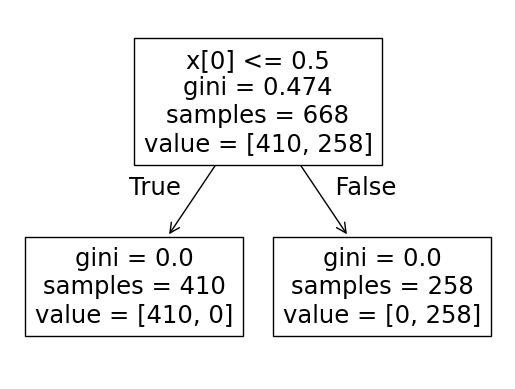

In [155]:
tree.plot_tree(model)
plt.show()